# Natural Language Processing using NLTK



In [9]:
# Install NLTK - pip install nltk


!pip3 install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/0ddeade5-3577-4fe
[nltk_data]     8-8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/0ddeade5-3577-4fe8-
[nltk_data]     8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 

In [10]:
import urllib
import bs4 as bs
import re

In [31]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [12]:
text[:100]

" contemporary climate change includes both global warming and its impacts on earth's weather pattern"

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!



In [13]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''
import urllib
import bs4 as bs
import re

# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/NPL' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser")

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text


tokens = nltk.word_tokenize(text)
words = nltk.pos_tag(tokens)

print(tokens)

['NPL', 'can', 'refer', 'to', ':']


In [14]:
print(words[:10])

[('NPL', 'NNP'), ('can', 'MD'), ('refer', 'VB'), ('to', 'TO'), (':', ':')]


In [15]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
import urllib
import bs4 as bs
import re

# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Water' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser")

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[:10])

["\nWater (chemical formula H2O) is an inorganic, transparent, tasteless, odorless, and nearly colorless chemical substance, which is the main constituent of Earth's hydrosphere and the fluids of all known living organisms (in which it acts as a solvent[1]).", 'It is vital for all known forms of life, even though it provides neither food, energy, nor organic micronutrients.', 'Its chemical formula, H2O, indicates that each of its molecules contains one oxygen and two hydrogen atoms, connected by covalent bonds.', 'The hydrogen atoms are attached to the oxygen atom at an angle of 104.45°.', '[2] "Water" is also the name of the liquid state of H2O at standard temperature and pressure.', 'A number of natural states of water exist.', 'It forms precipitation in the form of rain and aerosols in the form of fog.', 'Clouds consist of suspended droplets of water and ice, its solid state.', 'When finely divided, crystalline ice may precipitate in the form of snow.', 'The gaseous state of water i

In [16]:
print(sentences[:10])

["\nWater (chemical formula H2O) is an inorganic, transparent, tasteless, odorless, and nearly colorless chemical substance, which is the main constituent of Earth's hydrosphere and the fluids of all known living organisms (in which it acts as a solvent[1]).", 'It is vital for all known forms of life, even though it provides neither food, energy, nor organic micronutrients.', 'Its chemical formula, H2O, indicates that each of its molecules contains one oxygen and two hydrogen atoms, connected by covalent bonds.', 'The hydrogen atoms are attached to the oxygen atom at an angle of 104.45°.', '[2] "Water" is also the name of the liquid state of H2O at standard temperature and pressure.', 'A number of natural states of water exist.', 'It forms precipitation in the form of rain and aerosols in the form of fog.', 'Clouds consist of suspended droplets of water and ice, its solid state.', 'When finely divided, crystalline ice may precipitate in the form of snow.', 'The gaseous state of water i

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/0ddeade5-3577-4
[nltk_data]     fe8-8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
def remove_stopwords(sentences):
    ### Some code goes here. Hint: You may have to look up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        word_tokens = nltk.word_tokenize(sentences[i])
        word_tokens = [w for w in word_tokens if w not in stopwords.words('english')]
        sentences[i] = ' '.join(word_tokens)
        ### Some code goes here. Hint: You may have to look up how to removen stopwordword_tokens in NLTK if you get stuck. ###return sentences
    return sentences
###Then actually apply your function###
sentences = remove_stopwords(sentences)
# print(word_tokens)
print(sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

["Water ( chemical formula H2O ) inorganic , transparent , tasteless , odorless , nearly colorless chemical substance , main constituent Earth 's hydrosphere fluids known living organisms ( acts solvent [ 1 ] ) .", 'It vital known forms life , even though provides neither food , energy , organic micronutrients .', 'Its chemical formula , H2O , indicates molecules contains one oxygen two hydrogen atoms , connected covalent bonds .', 'The hydrogen atoms attached oxygen atom angle 104.45° .', "[ 2 ] `` Water '' also name liquid state H2O standard temperature pressure .", 'A number natural states water exist .', 'It forms precipitation form rain aerosols form fog .', 'Clouds consist suspended droplets water ice , solid state .', 'When finely divided , crystalline ice may precipitate form snow .', 'The gaseous state water steam water vapor .']


In [19]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
def remove_punctuation(sentences):
    punc = ". ? / '' , : ; "" ( ) { } [ ] ! @ # $ % ^ & * \ | = + - _ ` ~ < >".split()
    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
#         nltk.download("punkt")
        words = nltk.word_tokenize(sentences[i])
        new_words = [word for word in words if word not in punc]
        sentences[i] = ' '.join(new_words)
#         sentences = new_words
    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation.

["Water chemical formula H2O inorganic transparent tasteless odorless nearly colorless chemical substance main constituent Earth 's hydrosphere fluids known living organisms acts solvent 1", 'It vital known forms life even though provides neither food energy organic micronutrients', 'Its chemical formula H2O indicates molecules contains one oxygen two hydrogen atoms connected covalent bonds', 'The hydrogen atoms attached oxygen atom angle 104.45°', '2 `` Water `` also name liquid state H2O standard temperature pressure', 'A number natural states water exist', 'It forms precipitation form rain aerosols form fog', 'Clouds consist suspended droplets water ice solid state', 'When finely divided crystalline ice may precipitate form snow', 'The gaseous state water steam water vapor']


## NLP Part 3a - Stemming the words
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!

In [20]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(words):
    for i in words:
        print(stemmer.stem(i))

# try each of the words below
#stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

In [21]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''
new_senteces = []
def stem_sentences(sentences):
    for i in range(len(sentences)):
        word_tokens = nltk.word_tokenize(sentences[i])
        word_token = [stemmer.stem(w) for w in word_tokens]
        sentences[i] = " ".join(word_token)
        return sentences
        ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###
stemmed_sentences = stem_sentences(sentences)

In [22]:

print(stemmed_sentences[:10])

["water chemic formula h2o inorgan transpar tasteless odorless nearli colorless chemic substanc main constitu earth 's hydrospher fluid known live organ act solvent 1", 'It vital known forms life even though provides neither food energy organic micronutrients', 'Its chemical formula H2O indicates molecules contains one oxygen two hydrogen atoms connected covalent bonds', 'The hydrogen atoms attached oxygen atom angle 104.45°', '2 `` Water `` also name liquid state H2O standard temperature pressure', 'A number natural states water exist', 'It forms precipitation form rain aerosols form fog', 'Clouds consist suspended droplets water ice solid state', 'When finely divided crystalline ice may precipitate form snow', 'The gaseous state water steam water vapor']


## NLP Part 3b - Lemmatization

Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).



In [23]:
from nltk.stem import WordNetLemmatizer

## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()
'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        new_words = [lemmatizer.lemmatize(w) for w in words]
        sentences[i] = " ".join(new_words)
    return sentences
sentences = lem_sentences(sentences)
print(sentences[:10])

["water chemic formula h2o inorgan transpar tasteless odorless nearli colorless chemic substanc main constitu earth 's hydrospher fluid known live organ act solvent 1", 'It vital known form life even though provides neither food energy organic micronutrient', 'Its chemical formula H2O indicates molecule contains one oxygen two hydrogen atom connected covalent bond', 'The hydrogen atom attached oxygen atom angle 104.45°', '2 `` Water `` also name liquid state H2O standard temperature pressure', 'A number natural state water exist', 'It form precipitation form rain aerosol form fog', 'Clouds consist suspended droplet water ice solid state', 'When finely divided crystalline ice may precipitate form snow', 'The gaseous state water steam water vapor']


## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [24]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/0ddeade5-3577-4fe8-8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
print(tagged_paragraph[:1001]) #it doesn't count the last number so it would go to 1001 to get the first 1000 #ok

Water_NNP (_( chemical_JJ formula_NN H2O_NNP )_) is_VBZ an_DT inorganic_JJ ,_, transparent_JJ ,_, tasteless_JJ ,_, odorless_JJ ,_, and_CC nearly_RB colorless_JJ chemical_JJ substance_NN ,_, which_WDT is_VBZ the_DT main_JJ constituent_NN of_IN Earth_NNP 's_POS hydrosphere_NN and_CC the_DT fluids_NNS of_IN all_DT known_VBN living_NN organisms_NNS (_( in_IN which_WDT it_PRP acts_VBZ as_IN a_DT solvent_JJ [_NN 1_CD ]_NN )_) ._. It_PRP is_VBZ vital_JJ for_IN all_DT known_VBN forms_NNS of_IN life_NN ,_, even_RB though_IN it_PRP provides_VBZ neither_CC food_NN ,_, energy_NN ,_, nor_CC organic_JJ micronutrients_NNS ._. Its_PRP$ chemical_JJ formula_NN ,_, H2O_NNP ,_, indicates_VBZ that_IN each_DT of_IN its_PRP$ molecules_NNS contains_VBZ one_CD oxygen_NN and_CC two_CD hydrogen_NN atoms_NNS ,_, connected_VBN by_IN covalent_JJ bonds_NNS ._. The_DT hydrogen_NN atoms_NNS are_VBP attached_VBN to_TO the_DT oxygen_NN atom_NN at_IN an_DT angle_NN of_IN 104.45°_CD ._. [_VB 2_CD ]_NNP ``_`` Water_NNP ''_

# Word2Vec Model Visualization

In [30]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/0ddeade5-3577-4fe8-
[nltk_data]     8cd6-8a0cb653428e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
#Let's go ahead and create a list that's formatted how word2vec needs:
# a list of lists where the "i"th entry in the list is the word tokenizaiton of the "i"th sentence (after preprocessing)

sent = nltk.sent_tokenize(text)
sent = remove_punctuation(sent)
sent = remove_stopwords(sent)
for i in range(len(sent)):
    sent[i] = [t for t in nltk.word_tokenize(sent[i])]

In [43]:
# print the tokenized list of lists
sent[:10]

[['contemporary',
  'climate',
  'change',
  'includes',
  'global',
  'warming',
  'impacts',
  'earth',
  "'s",
  'weather',
  'patterns'],
 ['previous',
  'periods',
  'climate',
  'change',
  'current',
  'changes',
  'distinctly',
  'rapid',
  'due',
  'natural',
  'causes'],
 ['instead',
  'caused',
  'emission',
  'greenhouse',
  'gases',
  'mostly',
  'carbon',
  'dioxide',
  'co',
  'methane'],
 ['burning', 'fossil', 'fuels', 'energy', 'use', 'creates', 'emissions'],
 ['certain',
  'agricultural',
  'practices',
  'industrial',
  'processes',
  'forest',
  'loss',
  'additional',
  'sources'],
 ['greenhouse',
  'gases',
  'transparent',
  'sunlight',
  'allowing',
  'heat',
  'earth',
  "'s",
  'surface'],
 ['earth',
  'emits',
  'heat',
  'infrared',
  'radiation',
  'gases',
  'absorb',
  'trapping',
  'heat',
  'near',
  'earth',
  "'s",
  'surface'],
 ['planet',
  'heats',
  'causes',
  'changes',
  'like',
  'loss',
  'sunlight-reflecting',
  'snow',
  'cover',
  'amplify

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 



In [44]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
model = Word2Vec(sent, min_count=1)
# get the most common words of the model (it's entire vocabulary)
most_common_words =  model.wv.index_to_key
# save the model to use it later
model.save("word2vec.model")
# model = Word2Vec.load("word2vec.model")

In [46]:
#print the first 10 most common words.

print(most_common_words[:10])

['climate', 'change', 'warming', 'emissions', 'global', 'co', 'energy', 'carbon', 'greenhouse', '°c']


In [24]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function

In [47]:
similar = model.wv.most_similar('climate')
print(similar)

[('system', 0.3913601338863373), ('coral', 0.38536909222602844), ('gases', 0.35050633549690247), ('significant', 0.33979934453964233), ('``', 0.3367622494697571), ('nations', 0.3219573199748993), ('causes', 0.3188934028148651), ('also', 0.3024670481681824), ('carbon', 0.2935003638267517), ('causing', 0.28829899430274963)]


## Testing our model



In [48]:
    # Finding Word Vectors - print word vectors for certain words in your text
word_vec = model.wv['climate']
print(word_vec)

[-0.00314612  0.00404665  0.00509241  0.00928995 -0.00900911 -0.0138689
  0.0076536   0.0167589  -0.00698014 -0.00488331  0.00554527 -0.00645256
 -0.00560358  0.00826204 -0.0034516  -0.00437994  0.00349112 -0.0030109
 -0.00940492 -0.01610258  0.00901277  0.00702261  0.00889597 -0.00173891
  0.00557423 -0.00378565 -0.00361251  0.00365716 -0.01000858 -0.00320483
 -0.00294772  0.00014136  0.0100459  -0.00898555 -0.0038411   0.00203079
  0.00925643 -0.0087911  -0.00170461 -0.00976204 -0.01046149  0.00088515
 -0.00975406 -0.00369826  0.00315434 -0.00112797 -0.0108799   0.0094914
  0.00659213  0.01036669 -0.0069658   0.00065172 -0.00649215  0.00064724
  0.00566956 -0.00125367  0.00873568 -0.00646224 -0.00675302  0.01013707
 -0.00089155  0.00052069 -0.00484216 -0.00653242 -0.00530052  0.00666831
 -0.00120562  0.00810757 -0.00755596  0.00670947  0.00208056  0.00986107
  0.00270503 -0.0105209   0.00716663  0.00266719  0.0082632  -0.00165334
 -0.00564285 -0.00739624 -0.00133163  0.00345656  0.00

In [49]:
### Finding the most similar words in the model ###
#like this?
similar1 = model.wv.most_similar('climate')
print(similar1)

[('system', 0.3913601338863373), ('coral', 0.38536909222602844), ('gases', 0.35050633549690247), ('significant', 0.33979934453964233), ('``', 0.3367622494697571), ('nations', 0.3219573199748993), ('causes', 0.3188934028148651), ('also', 0.3024670481681824), ('carbon', 0.2935003638267517), ('causing', 0.28829899430274963)]


In [53]:
similar2 = model.wv.most_similar('warming')
print(similar2)

[('however', 0.4291105568408966), ('bushfires', 0.3381921648979187), ('natural', 0.3162209093570709), ('also', 0.30667051672935486), ('greenhouse', 0.3042752742767334), ('oxide', 0.29516249895095825), ('fluorinated', 0.2866035997867584), ('energy', 0.2865983843803406), ('nitrous', 0.28068965673446655), ('directly', 0.2772764265537262)]


In [55]:
print(similar1, similar2)

[('system', 0.3913601338863373), ('coral', 0.38536909222602844), ('gases', 0.35050633549690247), ('significant', 0.33979934453964233), ('``', 0.3367622494697571), ('nations', 0.3219573199748993), ('causes', 0.3188934028148651), ('also', 0.3024670481681824), ('carbon', 0.2935003638267517), ('causing', 0.28829899430274963)] [('however', 0.4291105568408966), ('bushfires', 0.3381921648979187), ('natural', 0.3162209093570709), ('also', 0.30667051672935486), ('greenhouse', 0.3042752742767334), ('oxide', 0.29516249895095825), ('fluorinated', 0.2866035997867584), ('energy', 0.2865983843803406), ('nitrous', 0.28068965673446655), ('directly', 0.2772764265537262)]


<Figure size 432x288 with 0 Axes>

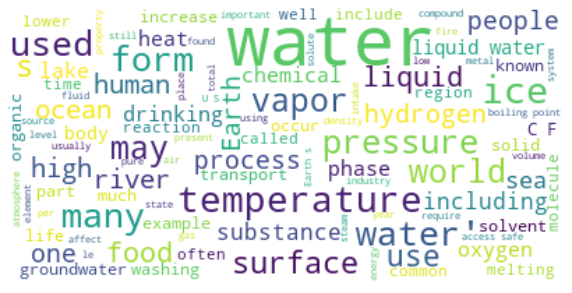

In [56]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [57]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [59]:
'''
Doing the same without removing stop words or lemming
'''

sent = nltk.sent_tokenize(text)
sent = remove_punctuation(sent)
for i in range(len(sent)):
    sent[i] = [t for t in nltk.word_tokenize(sent[i])]
# tokenize the text using sent_tokenize

# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

<Figure size 432x288 with 0 Axes>

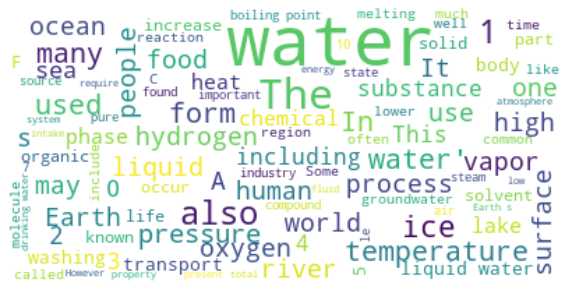

In [62]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50,
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [61]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

['climate', 'change', 'warming', 'emissions', 'global', 'co', 'energy', 'carbon', 'greenhouse', '°c']


In [64]:
# Finding a vector of a word, but badly
word_vec_bad = model.wv['like']
print(word_vec)

[-0.00314612  0.00404665  0.00509241  0.00928995 -0.00900911 -0.0138689
  0.0076536   0.0167589  -0.00698014 -0.00488331  0.00554527 -0.00645256
 -0.00560358  0.00826204 -0.0034516  -0.00437994  0.00349112 -0.0030109
 -0.00940492 -0.01610258  0.00901277  0.00702261  0.00889597 -0.00173891
  0.00557423 -0.00378565 -0.00361251  0.00365716 -0.01000858 -0.00320483
 -0.00294772  0.00014136  0.0100459  -0.00898555 -0.0038411   0.00203079
  0.00925643 -0.0087911  -0.00170461 -0.00976204 -0.01046149  0.00088515
 -0.00975406 -0.00369826  0.00315434 -0.00112797 -0.0108799   0.0094914
  0.00659213  0.01036669 -0.0069658   0.00065172 -0.00649215  0.00064724
  0.00566956 -0.00125367  0.00873568 -0.00646224 -0.00675302  0.01013707
 -0.00089155  0.00052069 -0.00484216 -0.00653242 -0.00530052  0.00666831
 -0.00120562  0.00810757 -0.00755596  0.00670947  0.00208056  0.00986107
  0.00270503 -0.0105209   0.00716663  0.00266719  0.0082632  -0.00165334
 -0.00564285 -0.00739624 -0.00133163  0.00345656  0.00

In [65]:
### Finding the most similar words in the model but... you get the idea ###
similar3 = model.wv.most_similar('water')
print(similar3)


[('also', 0.3867824077606201), ('aluminum', 0.35260501503944397), ('first', 0.32835787534713745), ('venice', 0.3189799189567566), ('sulfate', 0.3159080743789673), ('sixth', 0.3064368963241577), ('divestment', 0.2925642132759094), ('restoration', 0.28978389501571655), ('absorption', 0.2866246700286865), ('dissolves', 0.2858121395111084)]


## Reflection
How important do you think proper preprocessing in NLP is?